In [27]:
from astropy.io import ascii
from astropy.io import fits

from matplotlib import pyplot as plt

import seaborn as sns
%config InlineBackend.figure_format = 'retina'



In [2]:
import os

In [3]:
os.listdir('.')

['spec_bkg.arf',
 'hrcf62649_000N001_dtf1.fits.gz',
 'Untitled.ipynb',
 'hrcS_arlac_goodtime_evt2.fits',
 'hrcf62649N001_evt2.fits.gz',
 'hrcf62649_000N001_fov1.fits.gz',
 'spec.arf',
 'spec_bkg.rmf',
 'pcadf62649_000N001_asol1.fits.gz',
 'hrcf62649N001_full_img2.fits.gz',
 'source.reg',
 'spec_bkg.pi',
 '.ipynb_checkpoints',
 'bkg.reg',
 'hrcf62649N001_full_img2.jpg',
 'hrcf62649N001_cntr_img2.fits.gz',
 'spec.rmf',
 'hrcf62649N001_cntr_img2.jpg',
 'orbitf717595505N001_eph0.fits.gz',
 'spec.pi']

In [9]:
hdulist = fits.open('pha_dmextract.fits')
hdulist.info()
data = hdulist[1].data

Filename: pha_dmextract.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      28   ()      
  1  SPECTRUM      1 BinTableHDU    235   64R x 4C   [1J, 1D, 1J, 1D]   
  2  GTI           1 BinTableHDU     26   43R x 2C   [1D, 1D]   


In [10]:
data

FITS_rec([( 1,   1.5,    6, 1.27948314e-03),
          ( 2,   5.5,    0, 0.00000000e+00),
          ( 3,   9.5,   39, 8.31664042e-03),
          ( 4,  13.5,  449, 9.57479884e-02),
          ( 5,  17.5, 1169, 2.49285965e-01),
          ( 6,  21.5, 2118, 4.51657549e-01),
          ( 7,  25.5, 3767, 8.03302166e-01),
          ( 8,  29.5, 5459, 1.16411641e+00),
          ( 9,  33.5, 5118, 1.09139912e+00),
          (10,  37.5, 2877, 6.13512166e-01),
          (11,  41.5, 1340, 2.85751235e-01),
          (12,  45.5,  647, 1.37970932e-01),
          (13,  49.5,  293, 6.24814267e-02),
          (14,  53.5,  134, 2.85751235e-02),
          (15,  57.5,   51, 1.08756067e-02),
          (16,  61.5,   33, 7.03715728e-03),
          (17,  65.5,   10, 2.13247190e-03),
          (18,  69.5,    5, 1.06623595e-03),
          (19,  73.5,    3, 6.39741571e-04),
          (20,  77.5,    2, 4.26494380e-04),
          (21,  81.5,    2, 4.26494380e-04),
          (22,  85.5,    0, 0.00000000e+00),
          

In [12]:
data['PHA']

array([  1.5,   5.5,   9.5,  13.5,  17.5,  21.5,  25.5,  29.5,  33.5,
        37.5,  41.5,  45.5,  49.5,  53.5,  57.5,  61.5,  65.5,  69.5,
        73.5,  77.5,  81.5,  85.5,  89.5,  93.5,  97.5, 101.5, 105.5,
       109.5, 113.5, 117.5, 121.5, 125.5, 129.5, 133.5, 137.5, 141.5,
       145.5, 149.5, 153.5, 157.5, 161.5, 165.5, 169.5, 173.5, 177.5,
       181.5, 185.5, 189.5, 193.5, 197.5, 201.5, 205.5, 209.5, 213.5,
       217.5, 221.5, 225.5, 229.5, 233.5, 237.5, 241.5, 245.5, 249.5,
       253.5])

In [61]:
old = fits.getdata('march_pha_dmextract.fits')
old

FITS_rec([( 1,   1.5,    7, 1.70612711e-03),
          ( 2,   5.5,    1, 2.43732445e-04),
          ( 3,   9.5,    4, 9.74929778e-04),
          ( 4,  13.5,   47, 1.14554249e-02),
          ( 5,  17.5,  151, 3.68035991e-02),
          ( 6,  21.5,  396, 9.65180481e-02),
          ( 7,  25.5,  816, 1.98885675e-01),
          ( 8,  29.5, 1559, 3.79978881e-01),
          ( 9,  33.5, 2764, 6.73676477e-01),
          (10,  37.5, 3460, 8.43314258e-01),
          (11,  41.5, 3264, 7.95542699e-01),
          (12,  45.5, 2077, 5.06232287e-01),
          (13,  49.5, 1229, 2.99547174e-01),
          (14,  53.5,  717, 1.74756163e-01),
          (15,  57.5,  371, 9.04247370e-02),
          (16,  61.5,  190, 4.63091645e-02),
          (17,  65.5,   86, 2.09609902e-02),
          (18,  69.5,   29, 7.06824089e-03),
          (19,  73.5,   13, 3.16852178e-03),
          (20,  77.5,    9, 2.19359200e-03),
          (21,  81.5,    4, 9.74929778e-04),
          (22,  85.5,    4, 9.74929778e-04),
          

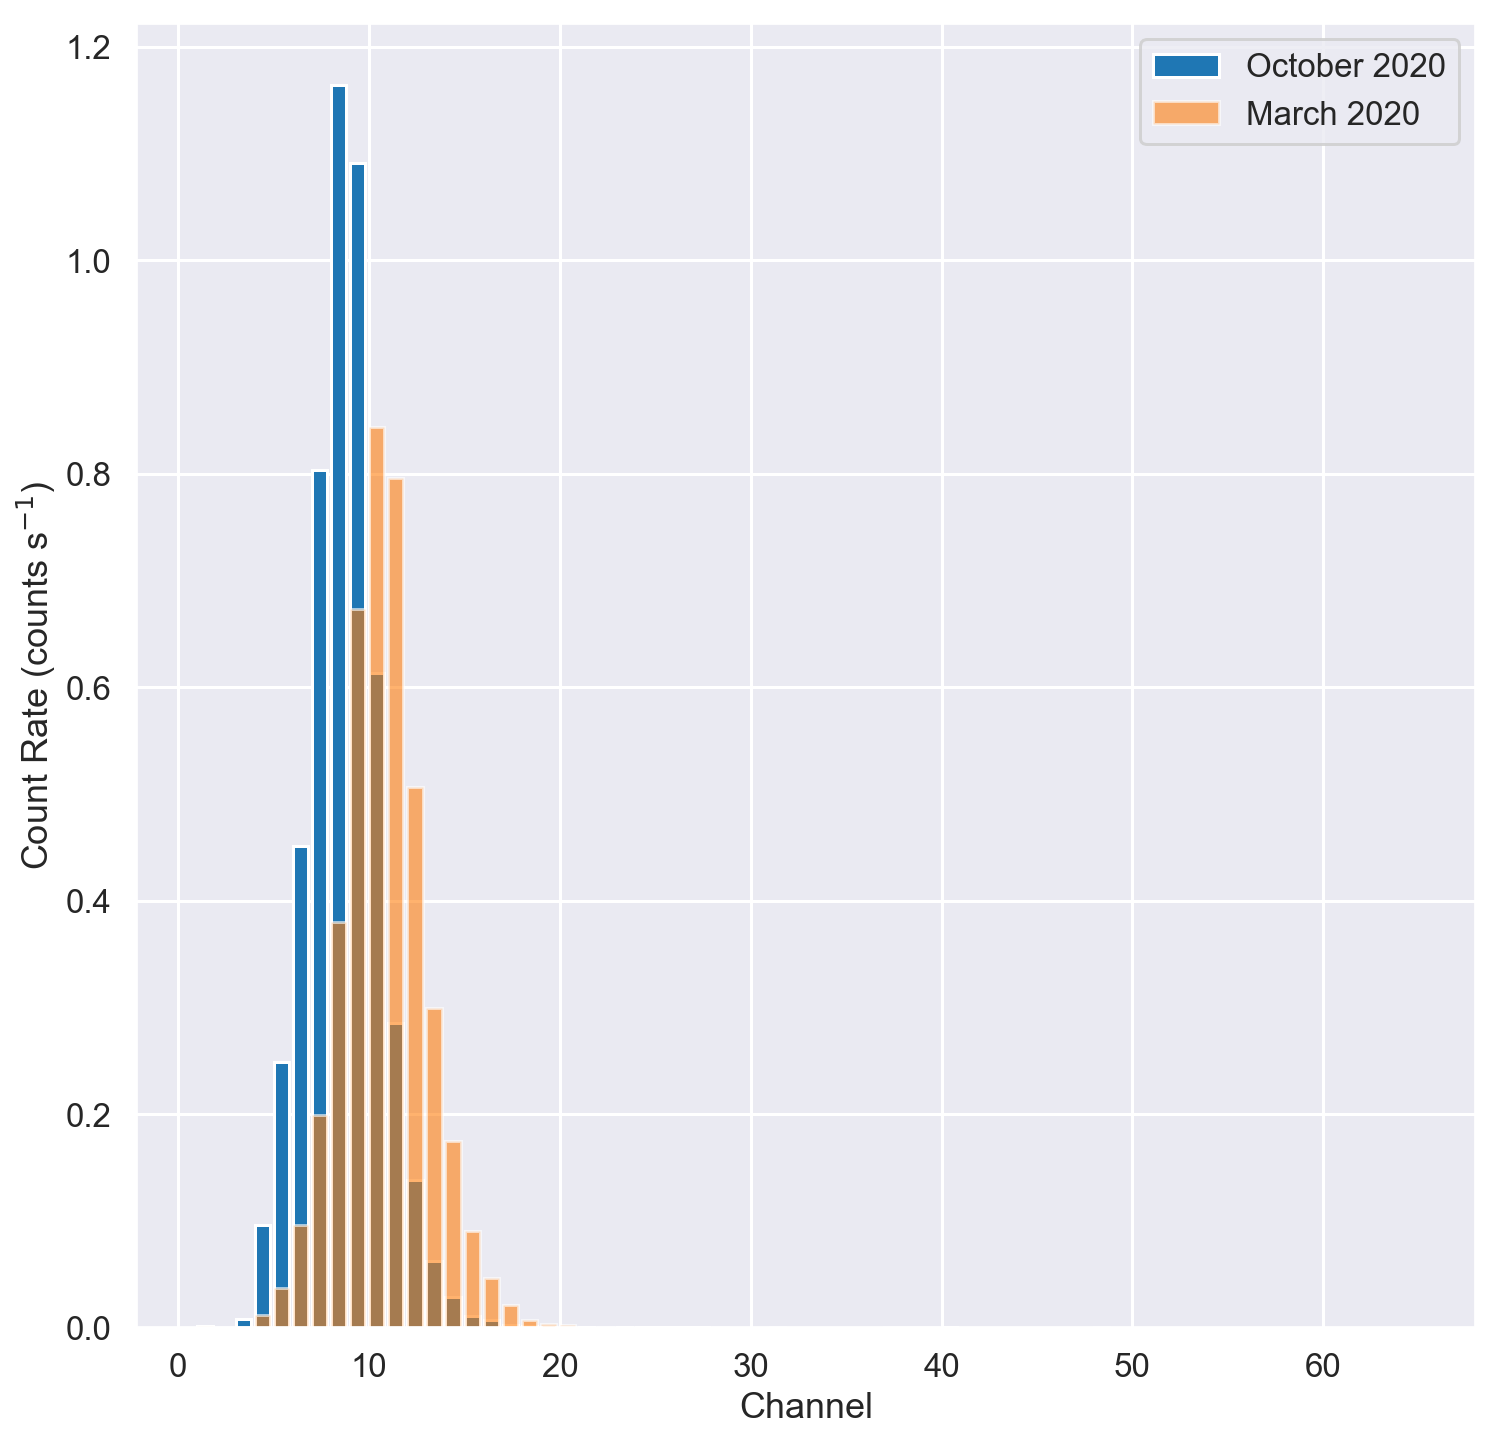

In [62]:
sns.set_style('darkgrid')
sns.set_context("talk", font_scale=1) 

fig, ax = plt.subplots(figsize=(12,12))

bars = data['CHANNEL']

ax.bar(data['CHANNEL'], data['COUNT_RATE'], align='edge', label="October 2020")
ax.bar(old['CHANNEL'], old['COUNT_RATE'], align='edge', alpha=0.6, label="March 2020")
ax.set_xlabel('Channel')
ax.set_ylabel(r'Count Rate (counts s$^{-1}$)')

ax.legend()

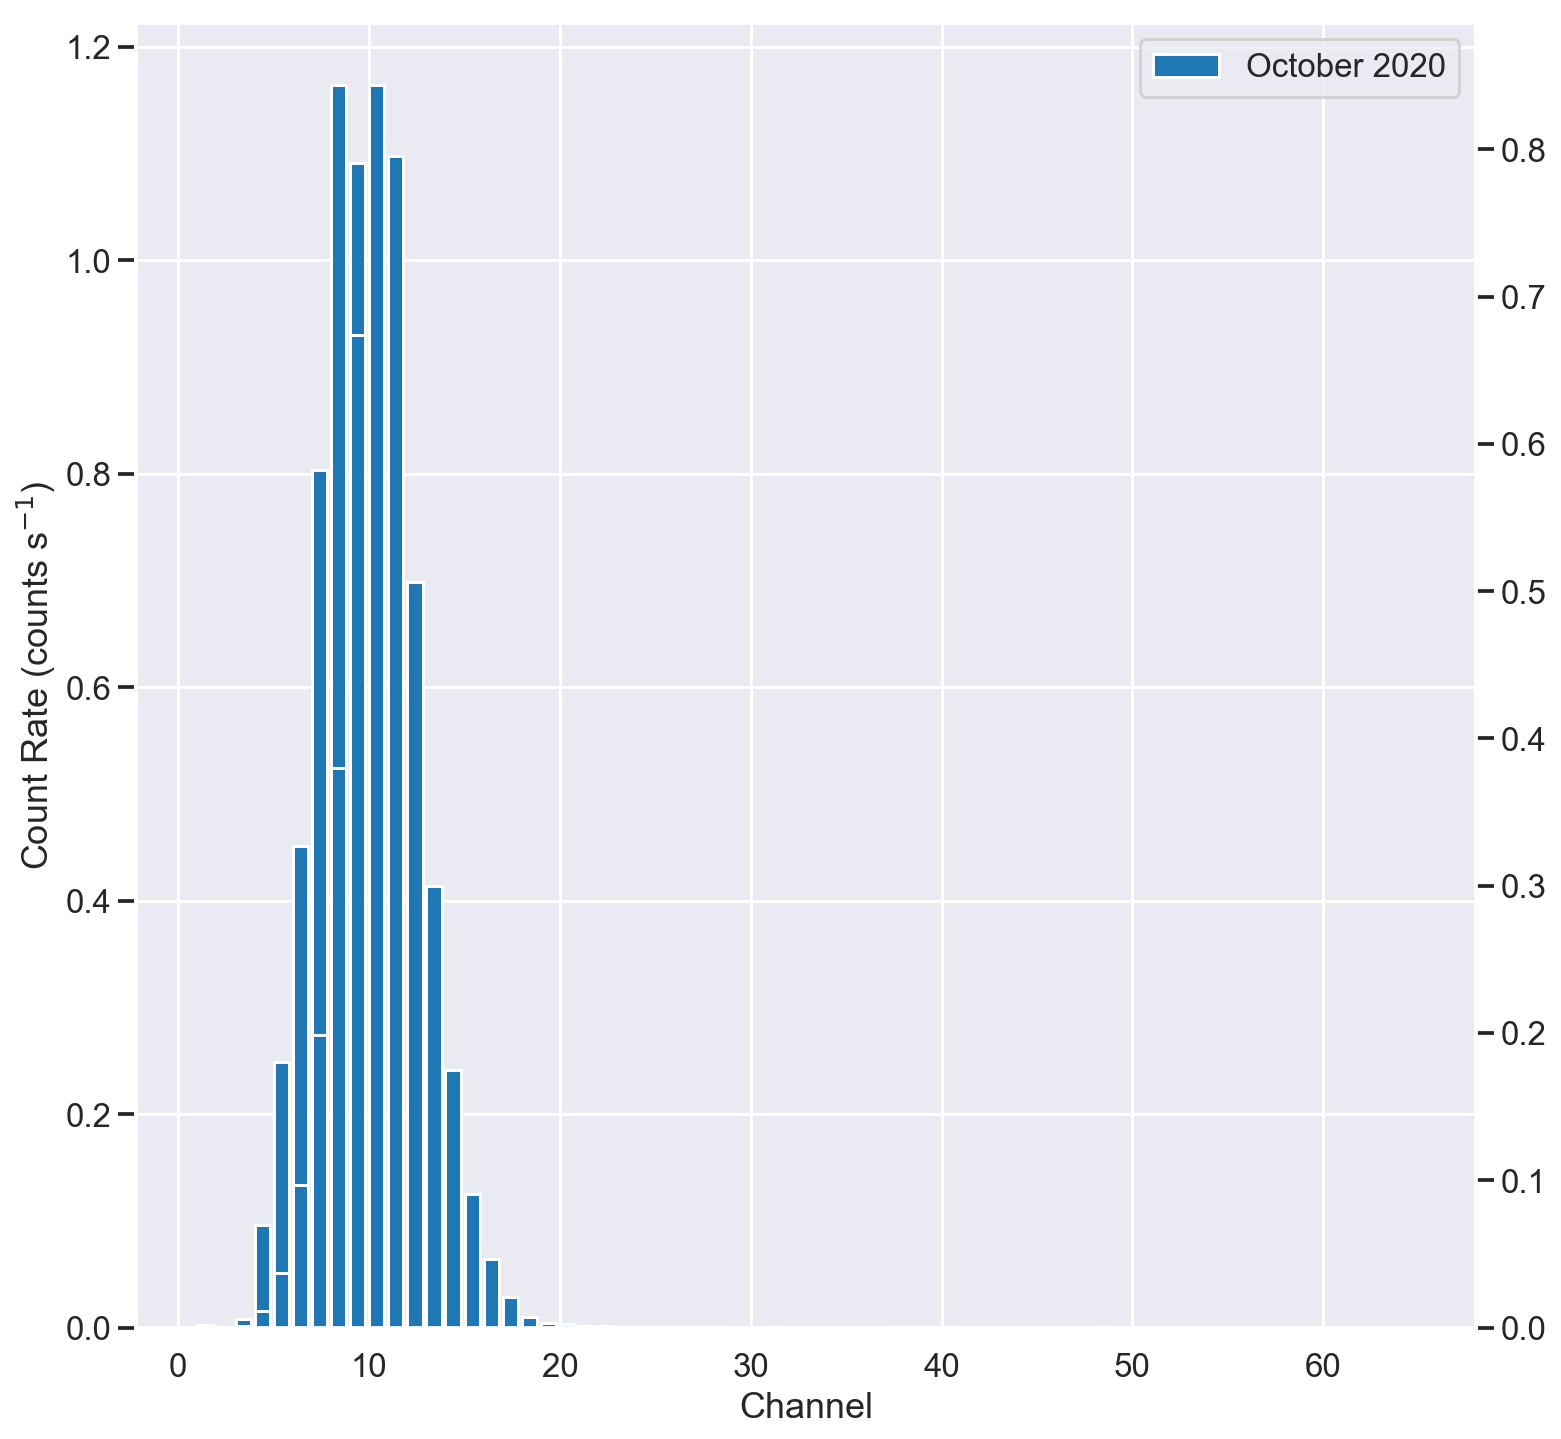

In [60]:
sns.set_style('darkgrid')
sns.set_context("talk", font_scale=1) 

fig, ax = plt.subplots(figsize=(12,12))

bars = data['CHANNEL']

ax.bar(data['CHANNEL'], data['COUNT_RATE'], align='edge', label="October 2020")

ax2 = plt.twinx(ax)
ax2.bar(old['CHANNEL'], old['COUNT_RATE'], align='edge', label="March 2020")
ax.set_xlabel('Channel')
ax.set_ylabel(r'Count Rate (counts s$^{-1}$)')

ax2.grid(False, axis='y')
ax.legend()